# LSTM (MNIST)

In [1]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3405 - accuracy: 0.8910 - val_loss: 0.1174 - val_accuracy: 0.9639
Epoch 2/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1058 - accuracy: 0.9683 - val_loss: 0.0774 - val_accuracy: 0.9769
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0729 - accuracy: 0.9783 - val_loss: 0.0766 - val_accuracy: 0.9778
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0561 - accuracy: 0.9832 - val_loss: 0.0622 - val_accuracy: 0.9809
Epoch 5/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0463 - accuracy: 0.9861 - val_loss: 0.0562 - val_accuracy: 0.9830
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0390 - accuracy: 0.9884 - val_loss: 0.0526 - val_accuracy: 0.9857
Epoch 7/10
60000/60000 [==============================]

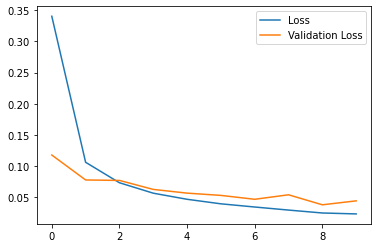

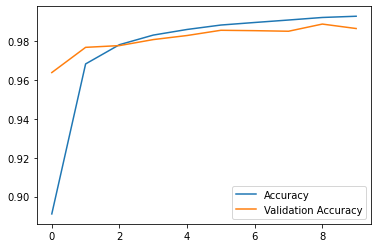

10000/10000 [==============================] - 1s 54us/sample - loss: 0.0438 - accuracy: 0.9866
Accuracy: 0.9865999817848206


In [4]:
i = tf.keras.layers.Input(shape=(28, 28))
x = tf.keras.layers.LSTM(128)(i)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.models.Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=10)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Plot the confusion matrix

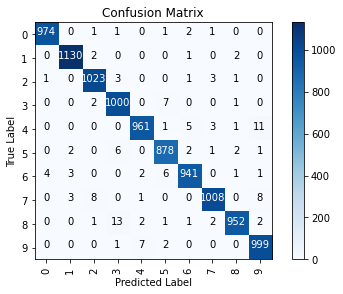

In [5]:
def plot_confusion_matrix(cm, labels):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    num_classes = len(labels)
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    
    threshold = cm.max() / 2
    for i, j in itertools.product(range(num_classes), range(num_classes)):
        plt.text(j, i, cm[i, j],
                 ha='center',
                 color='white' if cm[i, j] > threshold else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

## Display a random misclassified image

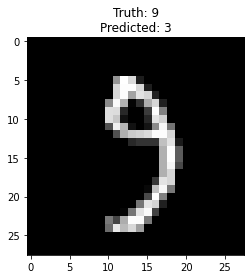

In [6]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'Truth: {y_test[i]}\nPredicted: {p_test[i]}')
plt.show()